<a href="https://colab.research.google.com/github/enzeeeh/ds-project/blob/main/ds-lab1/Text_Mining_Analysis_DS_LAB1_Topic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROJECT DATA SCIENCE LAB 1

### 0. Install and Import

In [1]:
# Import libs
import pandas as pd
import numpy as np
from datetime import datetime as dt
import re, string, unicodedata
string.punctuation
from time import time

# Libs for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium # map visualization
from wordcloud import WordCloud
import wordcloud
!pip install kneed
from kneed import KneeLocator
import pickle

import warnings
warnings.filterwarnings('ignore')

# Text preprocessing
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from nltk import pos_tag

# Metrics, Clustering algorithms, Topic modeling, Dimensionality reduction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
import scipy.cluster.hierarchy as sch
#Performance metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances, calinski_harabasz_score, silhouette_score

!pip install hdbscan
import hdbscan
import en_core_web_sm
nlp = en_core_web_sm.load()

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

%matplotlib inline
sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039285 sha256=077ac8951b4d195ddaaaa81db198c89cefdd349f82eebad8b7320f2ca6cf668f
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# mount drive from the gdrive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Load dataset
root_dir = '/content/drive/MyDrive/ds_lab_1/dataset/'

df = pd.read_excel(root_dir +'dataset.xlsx')

# Display the first few rows of the DataFrame
display(df.head(5))
print(f"\nNumber of rows and columns in dataset: {df.shape}")

,id,University Name,Study Program Name,City,Country,Year Established,Description
0,iva_rtu_security,Riga Technical University,Cybersecurity Engineering,Riga,lva,2021,"Brand new study program, with focus on industr..."
1,deu_hn_security,Hochschule Niederrhein,Cyber Security Management,Mönchengladbach,deu,2020,The study concept offers problem-based learnin...
2,NaN,University of Oulu,Cybersecurity specialisation for Computer Scie...,Oulu,fin,2023,The student specialising in cybersecurity will...
3,NaN,European University Cyprus,MSc in Cybersecurity,Nicosia,cyp,2017,The MSc in Cybersecurity at EUC addresses the ...
4,NaN,Escuela Internacional de Criminología y Crimin...,High Specialization Master in Forensic Computi...,San Juan de Alicante,esp,2006,This master offers the student a complete trai...



Number of rows and columns in dataset: (143, 7)


We only use two column for the Analysis [Study Program Name] and [Description]

In [ ]:
data = df[['Study Program Name', 'Description']]

In [ ]:
# Combining all the clustering attributes into a single column
data['program_name_and_description'] = (data['Study Program Name'] + ' ' + data['Description'])
data

,Study Program Name,Description,program_name_and_description
0,Cybersecurity Engineering,"Brand new study program, with focus on industr...",Cybersecurity Engineering Brand new study prog...
1,Cyber Security Management,The study concept offers problem-based learnin...,Cyber Security Management The study concept of...
2,Cybersecurity specialisation for Computer Scie...,The student specialising in cybersecurity will...,Cybersecurity specialisation for Computer Scie...
3,MSc in Cybersecurity,The MSc in Cybersecurity at EUC addresses the ...,MSc in Cybersecurity The MSc in Cybersecurity ...
4,High Specialization Master in Forensic Computi...,This master offers the student a complete trai...,High Specialization Master in Forensic Computi...
...,...,...,...
138,Computer Engineering and Science for Cybersecu...,The course in Computer Engineering and Science...,Computer Engineering and Science for Cybersecu...
139,Master of Science in Cyber Risk Strategy and G...,The program gives students the tools required ...,Master of Science in Cyber Risk Strategy and G...
140,"Cyber Security, Master of Science in Technology",The programme is also a part of the EIT Digita...,"Cyber Security, Master of Science in Technolog..."
141,Master in International Cybersecurity and Cybe...,The Master in International Cybersecurity and ...,Master in International Cybersecurity and Cybe...


# 1. Exploratory Data Analysis and Text Preprocessing

In [ ]:
unique_list = []
for col in df.columns:
    # creating tuple: column name, number of unique values, type
    item = (col, df[col].nunique(), df[col].dtypes, df[col].unique())
    unique_list.append(item)

unique_counts = pd.DataFrame(
    unique_list,
    columns=["Column_Name", "Num_Unique", "Type", "Unique_category"]
).sort_values(by="Num_Unique")


display(unique_counts)

,Column_Name,Num_Unique,Type,Unique_category
0,id,2,object,"[iva_rtu_security, deu_hn_security, nan]"
5,Year Established,24,int64,"[2021, 2020, 2023, 2017, 2006, 2019, 2000, 200..."
4,Country,29,object,"[lva, deu, fin, cyp, esp, bgr, aut, ita, pol, ..."
3,City,100,object,"[Riga, Mönchengladbach, Oulu, Nicosia, San Jua..."
2,Study Program Name,116,object,"[Cybersecurity Engineering, Cyber Security Man..."
1,University Name,118,object,"[Riga Technical University, Hochschule Niederr..."
6,Description,143,object,"[Brand new study program, with focus on indust..."


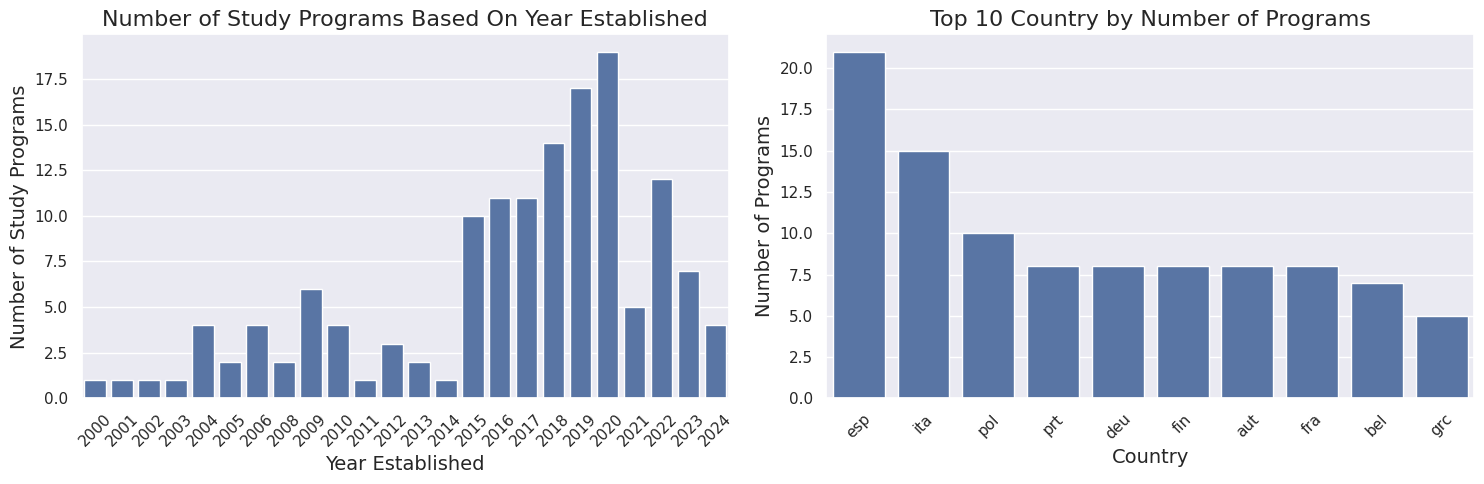

In [ ]:
# coordinate systems visualization
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

# Bar chart for timeline of each year established
sns.countplot(
    x="Year Established",
    data=df,
    ax=axes[0]
)
axes[0].set_title("Number of Study Programs Based On Year Established", fontsize=16)
axes[0].set_xlabel("Year Established", fontsize=14)
axes[0].set_ylabel("Number of Study Programs", fontsize=14)
axes[0].tick_params(axis='x', rotation=45)

# Bar chart for country with the most number of programs
country_counts = df["Country"].value_counts().sort_values(ascending=False)
top_country = country_counts.head(10)

sns.barplot(
    x=top_country.index,
    y=top_country.values,
    ax=axes[1]
)
axes[1].set_title("Top 10 Country by Number of Programs", fontsize=16)
axes[1].set_xlabel("Country", fontsize=14)
axes[1].set_ylabel("Number of Programs", fontsize=14)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Text preprocessing is the practice of cleaning and preparing text data. This is one of the most crucial steps in the process.

Using NLTK, study program title and description are then pre-processed with the following:

**tokenization** — convert sentences to words converting the text to lower case

**stopwords removal** - frequent words which have not any semantic sense
removing punctuation, numerical values, some extra examples

**lemmatization** - convert the word into a root word
using WordNetLemmatizer in order to get correct word form based on the context

**vectorization** - numerically representation of text (tf-idf vectorization)

In [ ]:
print(SnowballStemmer("english").stem("enginering"))
print(SnowballStemmer("english", ignore_stopwords=True).stem("having"))

engin
having


In [ ]:
import re
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

# Remove HTML elements
data['cleaning_process'] = data['program_name_and_description'].str.replace(r'<[^<>]*>', '', regex=True)
# Remove special characters, numbers and multiple space
data['cleaning_process'] = data['cleaning_process'].str.replace(r'[^\w\s]|[\d]', '', regex=True)
# Remove multiple space
data['cleaning_process'] = data['cleaning_process'].str.replace(r'\s+', ' ', regex=True)
# Lowercase
data['cleaning_process'] = data['cleaning_process'].str.lower()
# Tokenize the cleaned description
data['clean_token'] = data['cleaning_process'].apply(lambda x: nlp(x))
# Remove stop words and lemmatization
from spacy.lang.en.stop_words import STOP_WORDS
lemmatizer = WordNetLemmatizer()
data['clean_tokens_lemma'] = data['clean_token'].apply(lambda x: [lemmatizer.lemmatize(token.text, get_wordnet_pos(token.text)) for token in x if token.text not in STOP_WORDS])
data['clean_tokens_stopword'] = data['clean_token'].apply(lambda x: [token.text for token in x if token.text not in STOP_WORDS])
# Count to total of each tokens
data["token_number_lemma"] = data["clean_tokens_lemma"].apply(lambda x: len(x))
data["token_number_stopword"] = data["clean_tokens_stopword"].apply(lambda x: len(x))
# Put back tokens into one single string
data["clean_document_lemma"] = [" ".join(x) for x in data['clean_tokens_lemma']]
data["clean_document_stopword"] = [" ".join(x) for x in data['clean_tokens_stopword']]

In [ ]:
data.head()

,Study Program Name,Description,program_name_and_description,cleaning_process,clean_token,clean_tokens_lemma,clean_tokens_stopword,token_number_lemma,token_number_stopword,clean_document_lemma,clean_document_stopword
0,Cybersecurity Engineering,"Brand new study program, with focus on industr...",Cybersecurity Engineering Brand new study prog...,cybersecurity engineering brand new study prog...,"(cybersecurity, engineering, brand, new, study...","[cybersecurity, engineering, brand, new, study...","[cybersecurity, engineering, brand, new, study...",47,47,cybersecurity engineering brand new study prog...,cybersecurity engineering brand new study prog...
1,Cyber Security Management,The study concept offers problem-based learnin...,Cyber Security Management The study concept of...,cyber security management the study concept of...,"(cyber, security, management, the, study, conc...","[cyber, security, management, study, concept, ...","[cyber, security, management, study, concept, ...",37,37,cyber security management study concept offer ...,cyber security management study concept offers...
2,Cybersecurity specialisation for Computer Scie...,The student specialising in cybersecurity will...,Cybersecurity specialisation for Computer Scie...,cybersecurity specialisation for computer scie...,"(cybersecurity, specialisation, for, computer,...","[cybersecurity, specialisation, computer, scie...","[cybersecurity, specialisation, computer, scie...",39,39,cybersecurity specialisation computer science ...,cybersecurity specialisation computer science ...
3,MSc in Cybersecurity,The MSc in Cybersecurity at EUC addresses the ...,MSc in Cybersecurity The MSc in Cybersecurity ...,msc in cybersecurity the msc in cybersecurity ...,"(msc, in, cybersecurity, the, msc, in, cyberse...","[msc, cybersecurity, msc, cybersecurity, euc, ...","[msc, cybersecurity, msc, cybersecurity, euc, ...",49,49,msc cybersecurity msc cybersecurity euc addres...,msc cybersecurity msc cybersecurity euc addres...
4,High Specialization Master in Forensic Computi...,This master offers the student a complete trai...,High Specialization Master in Forensic Computi...,high specialization master in forensic computi...,"(high, specialization, master, in, forensic, c...","[high, specialization, master, forensic, compu...","[high, specialization, master, forensic, compu...",30,30,high specialization master forensic compute cy...,high specialization master forensic computing ...


In [ ]:
display_df = data.loc[:, ['clean_tokens_lemma', 'clean_tokens_stopword']]

display_df

,clean_tokens_lemma,clean_tokens_stopword
0,"[cybersecurity, engineering, brand, new, study...","[cybersecurity, engineering, brand, new, study..."
1,"[cyber, security, management, study, concept, ...","[cyber, security, management, study, concept, ..."
2,"[cybersecurity, specialisation, computer, scie...","[cybersecurity, specialisation, computer, scie..."
3,"[msc, cybersecurity, msc, cybersecurity, euc, ...","[msc, cybersecurity, msc, cybersecurity, euc, ..."
4,"[high, specialization, master, forensic, compu...","[high, specialization, master, forensic, compu..."
...,...,...
138,"[computer, engineering, science, cybersecurity...","[computer, engineering, science, cybersecurity..."
139,"[master, science, cyber, risk, strategy, gover...","[master, science, cyber, risk, strategy, gover..."
140,"[cyber, security, master, science, technology,...","[cyber, security, master, science, technology,..."
141,"[master, international, cybersecurity, cyberin...","[master, international, cybersecurity, cyberin..."


In [ ]:
data["token_number_lemma"].describe()

count    143.000000
mean      49.034965
std       15.176619
min        8.000000
25%       38.500000
50%       50.000000
75%       60.000000
max       81.000000
Name: token_number_lemma, dtype: float64

In [ ]:
from collections import Counter, defaultdict
# Get the top 20 most common words among all the job descriptions
p_text = [word.split() for word in data["clean_document_lemma"]]

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 10
top_10 = pd.DataFrame(
    Counter(p_text).most_common(10),
    columns=["word", "frequency"]
)

top_10

,word,frequency
0,cybersecurity,413
1,security,277
2,information,141
3,skill,124
4,cyber,119
5,master,110
6,system,97
7,european,91
8,ecsf,89
9,framework,88


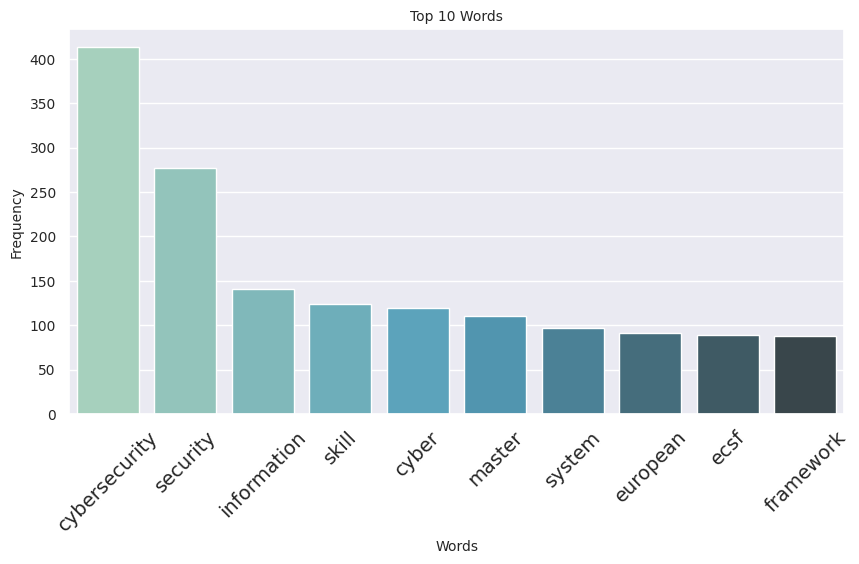

In [ ]:
# Plot a bar chart for the top 10 most frequently occuring words
fig = plt.figure(figsize=(10,5))

g = sns.barplot(
    x="word",
    y="frequency",
    data=top_10,
    palette="GnBu_d"
)

g.set_xticklabels(
    g.get_xticklabels(),
    rotation=45,
    fontsize=14
)

plt.yticks(fontsize=10)
plt.xlabel("Words", fontsize=10)
plt.ylabel("Frequency", fontsize=10)
plt.title("Top 10 Words", fontsize=10)


plt.show()

In [ ]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

1246

## Text clustering: TF-IDF + dimensionality reduction + clustering algorithms

In this project I use TF-IDF Vectorization (Term Frequency - Inverse Document Frequency)



### 1) Vectorise our dataset by TfIdfVectorizer()

Term Frequency (TF): This summarizes how often a given word appears within a document
Inverse Document Frequency (IDF): This downscales the words that appear a lot across documents.

TF-IDF Vectorizer takes into account not only how many times a word appears in a document but also how important that word is to the whole corpus.

In [ ]:
data_copy = data.copy()

In [ ]:
# TF-IDF vector

desc = data['clean_document_lemma'].values
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(desc)
word_features = vectorizer.get_feature_names_out()

print(len(word_features))
print(word_features[:50])

1243
['ability' 'able' 'academic' 'access' 'accessibility' 'accident'
 'accommodate' 'accord' 'accordance' 'account' 'accredit' 'achieve'
 'achievement' 'acquire' 'acquisition' 'acsc' 'action' 'active' 'activity'
 'actor' 'adapt' 'add' 'addition' 'additional' 'address' 'adequate'
 'administration' 'administrative' 'admission' 'adria' 'advanced'
 'advancement' 'advantage' 'affair' 'agency' 'agreement' 'ai' 'aim'
 'algebra' 'algorithm' 'align' 'allow' 'allows' 'alpen' 'alternative'
 'alto' 'analysis' 'analytic' 'analytics' 'analyze']


In [ ]:
X_tfidf.todense()
print(X_tfidf.shape)

(143, 1243)


Again, we have 143 study program name and 1242 unique words.


### 2) Reduce the [dimensionality](https:// [link text](https://)) of the data using


*   TruncatedSVD (Singular Value Decomposition)
*   PCA (Principal component analysis)
  



In [ ]:
# Use TruncatedSVD() for dimensional reduction
t0 = time()

tsvd = TruncatedSVD(n_components=X_tfidf.shape[1]-1)
X_tsvd = tsvd.fit(X_tfidf)

print(f"\nDimensionality reduction with SVD done in {time() - t0:.3f} s")


Dimensionality reduction with SVD done in 0.264 s


In [ ]:
# List of explained variances
tsvd_var_ratios = tsvd.explained_variance_ratio_

In [ ]:
"""
Create a function to select the best number of components
"""
def select_n_components(var_ratio, goal_var):
    # Set initial variance explained so far
    total_variance = 0.0

    # Set initial number of features
    n_components = 0

    # For the explained variance of each feature:
    for explained_variance in var_ratio:
        total_variance += explained_variance #add the explained variance to the total
        n_components += 1 #add one to the number of components

        if total_variance >= goal_var: #if we reach our goal level of explained variance
            # End the loop
            break

    # Return the number of components
    return n_components

In [ ]:
# Run function
select_n_components(tsvd_var_ratios, 0.95)

124

In [ ]:
# Dimensionality reduction by TruncatedSVD() with optimal number of components
tsvd_train = TruncatedSVD(n_components=124)
tsvd_matrix = tsvd_train.fit_transform(X_tfidf)
explained_variance = tsvd_train.explained_variance_ratio_.sum()

print(f"Shape of matrix: {tsvd_matrix.shape}")
print(f"\nExplained variance of the SVD step: {explained_variance * 100:.1f}%")

Shape of matrix: (143, 124)

Explained variance of the SVD step: 95.2%


In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(X_tfidf.toarray())

In [ ]:
# transformed features
x_pca = pca.transform(X_tfidf.toarray())
explained_variance_pca = pca.explained_variance_ratio_.sum()

print(f"Shape of matrix: {x_pca.shape}")
print(f"\nExplained variance of the PCA step: {explained_variance_pca * 100:.1f}%")

Shape of matrix: (143, 143)

Explained variance of the PCA step: 100.0%


Identifying the optimal number of clusters :

*   Elbow method
*   Silhouette score






In [ ]:
# Create list of inertia and silhouette_score values in different number of clusters
t0 = time()

wcss = []
silhouette = []

# training k_means model
# Fit on data (no need to normalize data, it already is due to TF-IDF)
for i in range(2,21,2):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=1, random_state=42)
    kmeans.fit(X_tfidf)
    wcss.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_tfidf, kmeans.labels_))


print(f"\nModel running with 20 different number of clusters done in {time() - t0:.3f} s")


Model running with 20 different number of clusters done in 0.201 s


Text(0, 0.5, 'Inertia value')

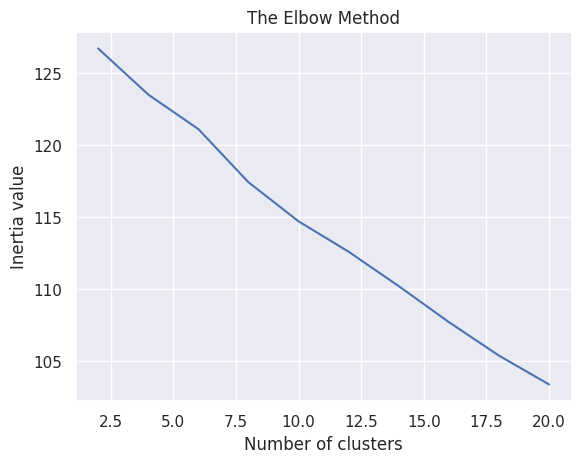

In [ ]:
"""
Elbow method plot
"""
plt.plot(range(2,21,2), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia value")

Text(0, 0.5, 'Silhouette score')

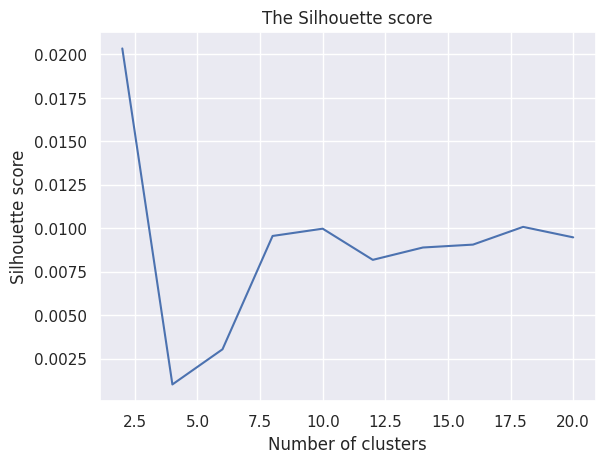

In [ ]:
"""
Silhouette score plot
"""
plt.plot(range(2,21,2), silhouette)
plt.title("The Silhouette score")
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette score")

In [ ]:
max_score = max(silhouette)
print(f"Optimal number of clusters - {silhouette.index(max_score)*5+5} with silhouette score value: {round(max_score, 4)}")

Optimal number of clusters - 5 with silhouette score value: 0.0203


In [ ]:
"""
Before we start to test another clustering algorithms
I want to check one more time how will be better - to use only TF-IDF vectorizer or with TruncatedSVD or with PCA?
"""
t0 = time()

# run kmeans model with TF-IDF vectors
kmeans_tfidf = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
kmeans_tfidf_clusters = kmeans_tfidf.fit_predict(X_tfidf)

print(f"KMeans\non tf-idf vectors: {round(silhouette_score(X_tfidf, kmeans_tfidf_clusters), 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

KMeans
on tf-idf vectors: 0.0115

Model running done in 0.142 s


In [ ]:
t0 = time()

# run MiniBatchKMeans model on TF-IDF vectors
minibatch_tfidf = MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)
minibatch_tfidf_clusters = minibatch_tfidf.fit_predict(X_tfidf)

print(f"MiniBatchKMeans\non tf-idf vectors: {round(silhouette_score(X_tfidf, minibatch_tfidf_clusters), 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

MiniBatchKMeans
on tf-idf vectors: 0.0095

Model running done in 2.125 s


In [ ]:
t0 = time()

# run kmeans model with LSA on TF-IDF vectors
kmeans_lsa = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
kmeans_lsa_clusters = kmeans_lsa.fit_predict(tsvd_matrix)

print(f"KMeans with LSA\non tf-idf vectors: {round(silhouette_score(tsvd_matrix, kmeans_lsa_clusters), 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

KMeans with LSA
on tf-idf vectors: 0.0018

Model running done in 0.146 s


In [ ]:
t0 = time()

# run MiniBatchKMeans model with LSA on TF-IDF vectors
minibatch_lsa = MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)
minibatch_lsa_clusters = minibatch_lsa.fit_predict(tsvd_matrix)

print(f"MiniBatchKMeans with LSA\non tf-idf vectors: {round(silhouette_score(tsvd_matrix, minibatch_lsa_clusters), 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

MiniBatchKMeans with LSA
on tf-idf vectors: -0.0078

Model running done in 0.232 s


In [ ]:
t0 = time()

# run kmeans model with PCA on TF-IDF vectors
kmeans_pca = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
kmeans_pca_clusters = kmeans_pca.fit_predict(x_pca)

print(f"KMeans with PCA\non tf-idf vectors: {round(silhouette_score(x_pca, kmeans_pca_clusters), 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

KMeans with PCA
on tf-idf vectors: 0.0115

Model running done in 0.124 s


In [ ]:
t0 = time()

# run MiniBatchKMeans model with LSA on TF-IDF vectors
minibatch_pca = MiniBatchKMeans(n_clusters=5, n_init=10, random_state=42)
minibatch_pca_clusters = minibatch_lsa.fit_predict(x_pca)

print(f"MiniBatchKMeans with PCA\non tf-idf vectors: {round(silhouette_score(x_pca, minibatch_pca_clusters), 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

MiniBatchKMeans with PCA
on tf-idf vectors: 0.0095

Model running done in 0.440 s


In [ ]:
t0 = time()

# run GaussianMixture model on TF-IDF vectors
gm = GaussianMixture(n_components=5, random_state=42)
gm_clustring_tfidf = gm.fit_predict(X_tfidf.toarray())
gm_silhouette_tfidf = silhouette_score(X_tfidf, gm_clustring_tfidf)

print(f"GaussianMixture \non tf-idf vectors: {round(gm_silhouette_tfidf, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

GaussianMixture 
on tf-idf vectors: 0.0016

Model running done in 5.341 s


In [ ]:
t0 = time()

# run GaussianMixture model with LSA on TF-IDF vectors
gm = GaussianMixture(n_components=5, random_state=42)
gm_clustring_tsvd = gm.fit_predict(tsvd_matrix)
gm_silhouette_tsvd = silhouette_score(tsvd_matrix, gm_clustring_tsvd)

print(f"GaussianMixture with LSA\non tf-idf vectors: {round(gm_silhouette_tsvd, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

GaussianMixture with LSA
on tf-idf vectors: 0.0069

Model running done in 0.101 s


In [ ]:
t0 = time()

# run GaussianMixture model with PCA on TF-IDF vectors
gm = GaussianMixture(n_components=5, random_state=42)
gm_clustring_pcs = gm.fit_predict(x_pca)
gm_silhouette_pcs = silhouette_score(x_pca, gm_clustring_pcs)

print(f"GaussianMixture with PCA\non tf-idf vectors: {round(gm_silhouette_pcs, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

GaussianMixture with PCA
on tf-idf vectors: 0.0016

Model running done in 0.127 s


In [ ]:
t0 = time()

# run Agglomerative model on TF-IDF vectors
agglo = AgglomerativeClustering(linkage="ward", n_clusters=17)
agglo_clustering_tfidf = agglo.fit_predict(X_tfidf.toarray())
agglo_silhouette_tfidf = silhouette_score(X_tfidf, agglo_clustering_tfidf)

print(f"Agglomerative \non tf-idf vectors: {round(agglo_silhouette_tfidf, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

Agglomerative 
on tf-idf vectors: 0.0217

Model running done in 0.089 s


In [ ]:
t0 = time()

# run Agglomerative model with LSA on TF-IDF vectors
agglo = AgglomerativeClustering(linkage="ward", n_clusters=17)
agglo_clustering_tsvd = agglo.fit_predict(tsvd_matrix)
agglo_silhouette_tsvd = silhouette_score(tsvd_matrix, agglo_clustering_tsvd)

print(f"Agglomerative with LSA\non tf-idf vectors: {round(agglo_silhouette_tsvd, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

Agglomerative with LSA
on tf-idf vectors: 0.0214

Model running done in 0.027 s


In [ ]:
t0 = time()

# run Agglomerative model with PCA on TF-IDF vectors
agglo = AgglomerativeClustering(linkage="ward", n_clusters=17)
agglo_clustering_pca = agglo.fit_predict(x_pca)
agglo_silhouette_pca = silhouette_score(x_pca, agglo_clustering_pca)

print(f"Agglomerative with PCA\non tf-idf vectors: {round(agglo_silhouette_pca, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

Agglomerative with PCA
on tf-idf vectors: 0.0217

Model running done in 0.020 s


In [ ]:
# Clustering on documents with DBSCAN
dbs = DBSCAN(eps=0.8, min_samples=5, metric="cosine", algorithm="brute") # number eps can try to find the optimal number, has a room for improvement.
dbs_clustering_tfidf = dbs.fit_predict(X_tfidf)
dcs_silhouette_tfidf = silhouette_score(X_tfidf, dbs_clustering_tfidf)

print(f"DBSCAN \non tf-idf vectors: {round(dcs_silhouette_tfidf, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

DBSCAN 
on tf-idf vectors: 0.0246

Model running done in 501.307 s


In [ ]:
# Clustering on documents with DBSCAN
dbs = DBSCAN(eps=0.5, min_samples=2, metric="cosine", algorithm="brute") # number eps can try to find the optimal number, has a room for improvement.
dbs_clustering_tsvd = dbs.fit_predict(tsvd_matrix)
dcs_silhouette_tsvd = silhouette_score(tsvd_matrix, dbs_clustering_tsvd)

print(f"DBSCAN with LSA \non tf-idf vectors: {round(dcs_silhouette_tsvd, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

DBSCAN with LSA 
on tf-idf vectors: -0.0212

Model running done in 125.485 s


In [ ]:
# Clustering on documents with DBSCAN
dbs = DBSCAN(eps=0.8, min_samples=5, metric="cosine", algorithm="brute") # number eps can try to find the optimal number, has a room for improvement.
dbs_clustering_pca = dbs.fit_predict(x_pca)
dcs_silhouette_pca = silhouette_score(x_pca, dbs_clustering_pca)

print(f"DBSCAN with PCA\non tf-idf vectors: {round(dcs_silhouette_tsvd, 4)}")
print(f"\nModel running done in {time() - t0:.3f} s")

DBSCAN with PCA
on tf-idf vectors: 0.0335

Model running done in 34.256 s


In [ ]:
tfidf_vs_lsa = pd.DataFrame({
    "Model Name": ["KMeans on TF-IDF", "KMeans with LSA on TF-IDF", "KMeans with PCA on TF-IDF"
                   ,"MiniBatchKMeans on TF-IDF", "MiniBatchKMeans with LSA on TF-IDF","MiniBatchKMeans with PCA on TF-IDF"
                   ,"GaussianMixture on TF-IDF", "GaussianMixture with LSA on TF-IDF","GaussianMixture with PCA on TF-IDF"
                   ,"Agglomerative on TF IDF", "Agglomerative with LSA on TF-IDF", "Agglomerative with PCA on TF-IDF"
                   ,"DBSCAN on TF-IDF","DBSCAN with LSA on TF-IDF","DBSCAN with PCA on TF-IDF"],
    "Silhouette score": ["0.0115", "0.0018","0.0115"
                   , "0.0095", "-0.0078","0.0095"
                   ,"0.0061","0.0200","0.0203"
                   ,"0.0217","0.0214","0.0217"
                   ,"0.0246","0.0335","0.0135"],
})

display(tfidf_vs_lsa)

,Model Name,Silhouette score
0,KMeans on TF-IDF,0.0115
1,KMeans with LSA on TF-IDF,0.0018
2,KMeans with PCA on TF-IDF,0.0115
3,MiniBatchKMeans on TF-IDF,0.0095
4,MiniBatchKMeans with LSA on TF-IDF,-0.0078
5,MiniBatchKMeans with PCA on TF-IDF,0.0095
6,GaussianMixture on TF-IDF,0.0061
7,GaussianMixture with LSA on TF-IDF,0.0200
8,GaussianMixture with PCA on TF-IDF,0.0203
9,Agglomerative on TF IDF,0.0217


We found the optimal cluster algorithm **DBSCAN with LSA on TF-IDF with Sillhoutte score 0.0335.**

Now I want to try to find the optimal number for the epsilon and the number for the cluster to use in the cluster algorithm DBSCAN.

In [ ]:
"""
Hyperparameter optimization by for loop
- eps is a distance measure that will be used to locate the points in the neighborhood of any point.
- min_samples is the fewest number of points required to form a cluster
"""
t0 = time()

min_samples = np.arange(2, 10, 1)
eps = np.arange(0.60, 0.83, 0.02) # returns array of ranging from 0.6 to 0.8 with step of 0.02

output_eps = []

for ms in min_samples:
    for ep in eps:
        labels = DBSCAN(min_samples=ms, eps=ep, metric="cosine").fit(tsvd_matrix).labels_
        score = silhouette_score(tsvd_matrix, labels)
        # print(round(ms,3), round(ep,3), round(score,3))
        output_eps.append((ms, ep, score))

# Get the parameters for best silhouette score
min_samples, eps, score = sorted(output_eps, key=lambda x:x[-1])[-1]
print("DBSCAN model with LSA on TF-IDF vector")
print(f"Best silhouette_score: {round(score, 3)}")
print(f"min_samples: {min_samples}")
print(f"eps: {(round(eps, 1))}")

print(f"\nHyperparameters optimization done in {time() - t0:.3f} s")

DBSCAN model with LSA on TF-IDF vector
Best silhouette_score: 0.043
min_samples: 7
eps: 0.8

Hyperparameters optimization done in 1.179 s


The model has 0.043 maximum average silhouette score with epsilon = 0.8 and min_sample = 7.

min_samples' values [2,3,4,6,7,8,9]

eps' values [0.6, 0.7, 0.8]

So, now I'm ready to compare with other clustering models based on the Silhouette score value

In [ ]:
# apply kmeans algorithm
t0 = time()

kmeans_model = KMeans(n_clusters=5, init="k-means++", n_init=10, random_state=42)
kmeans_train = kmeans_model.fit(tsvd_matrix)
print(f"\nModel running done in {time() - t0:.3f} s")


Model running done in 0.143 s


In [ ]:
# apply agglomerative algorithm
t0 = time()

agglo_model = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=19)
agglomerative_clusters = agglo_model.fit_predict(tsvd_matrix)
print(f"\nModel running done in {time() - t0:.3f} s")


Model running done in 0.007 s


In [ ]:
# apply agglomerative algorithm
t0 = time()

gauss_model = GaussianMixture(n_components=2, random_state=42)
gaussian_clusters = gm.fit_predict(tsvd_matrix)
print(f"\nModel running done in {time() - t0:.3f} s")


Model running done in 0.076 s


In [ ]:
# apply DBSCAN algorithm: When dealing with texts, the distance metric to be used is cosine instead of "euclidean"
t0 = time()

model_dbscan = DBSCAN(eps=0.8, min_samples=7, metric="cosine", algorithm="brute")
dbscan_clusters = model_dbscan.fit_predict(tsvd_matrix)

print(f"\nModel running done in {time() - t0:.3f} s")


Model running done in 0.007 s


In [ ]:
def silhouette_method(df, algo, pred_clusters):
  print("=================================================================================")
  print(f"Clustering: {algo}  Silhouette score: {silhouette_score(df, pred_clusters)}")


silhouette_method(tsvd_matrix, "KMeans", kmeans_model.labels_)
silhouette_method(tsvd_matrix, "Agglomerative", agglomerative_clusters)
silhouette_method(tsvd_matrix, "Gaussian Mixture", gaussian_clusters)
silhouette_method(tsvd_matrix, "DBSCAN", dbscan_clusters)
print("=================================================================================")

Clustering: KMeans  Silhouette score: 0.0018167766992666983
Clustering: Agglomerative  Silhouette score: 0.012216833204360771
Clustering: Gaussian Mixture  Silhouette score: 0.006888899909977034
Clustering: DBSCAN  Silhouette score: 0.033463554637046915


In [ ]:
"""
Save kmeans model
"""
with open("./model_dbscan.pickle", "wb") as pkl_file:
    pickle.dump(model_dbscan, pkl_file)

## For, loading the final model
# with open("./kmeans_model.pickle", "rb") as pkl_file:
#     model_kmeans = pickle.load(pkl_file)

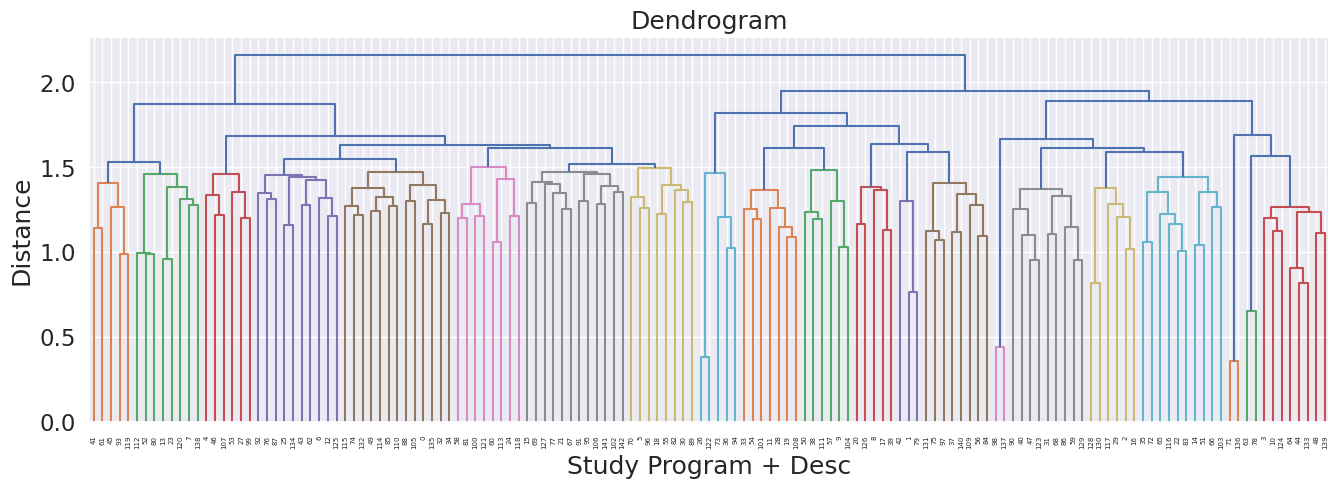

In [ ]:
# Building a dendogram to decide on the number of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(16, 5))
dend = shc.dendrogram(shc.linkage(tsvd_matrix, method='ward')) #LSA with TF-IDF
plt.title('Dendrogram')
plt.xlabel('Study Program + Desc')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

In [ ]:
results_kmean_300 = {}

for i in range(2, 100):
    kmeans = DBSCAN(eps=0.8, min_samples=7, metric="cosine", algorithm="brute")
    labels= kmeans.fit_predict(tsvd_matrix)
    silhouette_value = silhouette_score(tsvd_matrix, labels)
    results_kmean_300[i] = silhouette_value

In [ ]:
clusters_count = max(results_kmean_300, key=results_kmean_300.get)
clusters_count

2

In [ ]:
def visualize_clusters(X, y, clusters_count, figsize=(10,5), title=None, show_palette=True, font_scale=1.5):
    tsne = TSNE(n_components=2, verbose=0, random_state=42)
    z = tsne.fit_transform(X)

    tsne_df = pd.DataFrame()
    tsne_df["y"] = y
    tsne_df["comp-1"] = z[:,0]
    tsne_df["comp-2"] = z[:,1]

    plt.figure(figsize=figsize)

    sns.set(font_scale=font_scale)

    if show_palette:
        sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                    palette=sns.color_palette("hls", clusters_count),
                    data=tsne_df).set(title=title)
    else:
         sns.scatterplot(x="comp-1", y="comp-2", hue=tsne_df.y.tolist(),
                    data=tsne_df).set(title=title)

    plt.legend(loc='upper right', title='Clusters')

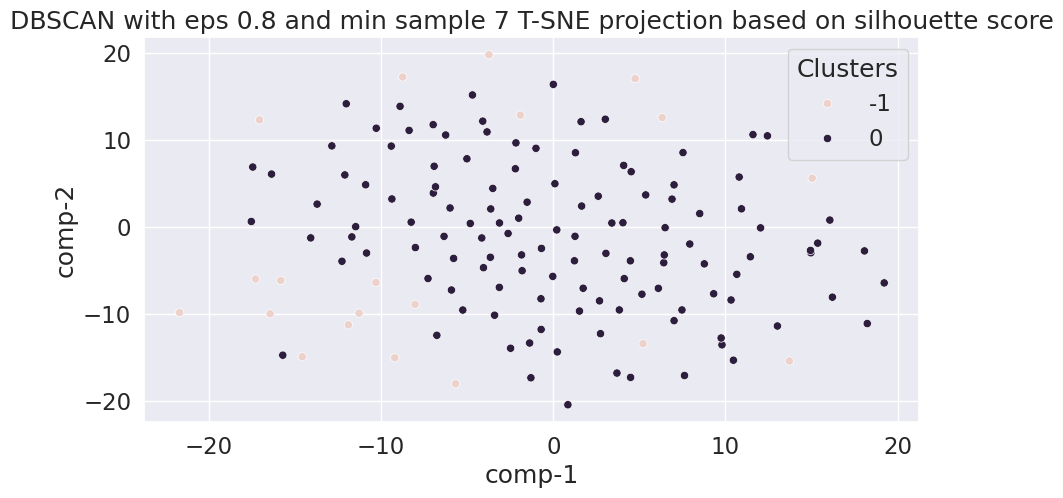

In [ ]:
title = "DBSCAN with eps 0.8 and min sample 7 T-SNE projection based on silhouette score"

visualize_clusters(tsvd_matrix, dbscan_clusters, clusters_count, title=title, show_palette=False)

In [ ]:
X_tfidf.shape

(143, 1243)

In [ ]:
data.shape

(143, 11)

In [ ]:
# Create a dataframe with tf-idf
X_df = pd.DataFrame(X_tfidf,
             columns=vectorizer.get_feature_names_out(),
             index=["item_{}".format(x) for x in range(data.shape[0])] )

X_df.head()

ValueError: Shape of passed values is (143, 1), indices imply (143, 1243)

In [ ]:
# Clustering on documents with DBSCAN
clustering = DBSCAN(eps=0.8, min_samples=7, metric="cosine", algorithm="brute")

# Fit on data
#No need to normalize data, it already is due to TF-IDF
clustering.fit(X)

# Write cluster ids into corpus and X_df
data['cluster_id'] = clustering.labels_
display(corpus.head())
X_df['cluster_id'] = clustering.labels_
display(X_df.head())

In [ ]:
# Elbow method to find the optimal value of k
wcss=[]
for i in range(1,31):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=33)
  kmeans.fit(x_pca)
  wcss_iter = kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters = range(1,31)
plt.figure(figsize=(10,5))
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [ ]:
output_eps = []

for ms in range(2,100,2):
        label = AgglomerativeClustering(n_clusters=ms, affinity='cosine', linkage='complete').fit(x_pca).labels_
        score = silhouette_score(x_pca, labels)
        # print(round(ms,4), round(score,4))
        output_eps.append((ms, score))

# Get the parameters for best silhouette score
min_samples, score = sorted(output_eps, key=lambda x:x[-1])[-1]
print("DBSCAN model with LSA on TF-IDF vector")
print(f"Best silhouette_score: {round(score, 3)}")
print(f"min_samples: {min_samples}")

print(f"\nHyperparameters optimization done in {time() - t0:.3f} s")

DBSCAN model with LSA on TF-IDF vector
Best silhouette_score: 0.013
min_samples: 98

Hyperparameters optimization done in 75.157 s


In [ ]:
results_agglo = {}

for i in range(2,20):
    agglo = AgglomerativeClustering(affinity='cosine', linkage='complete', n_clusters=i)
    labels = agglo.fit_predict(X_tfidf.toarray())
    silhouette_value = silhouette_score(X_tfidf, labels)
    results_agglo[i] = silhouette_value

In [ ]:
clusters_count = max(results_agglo, key=results_agglo.get)
clusters_count

17

In [ ]:
agg_clustring = AgglomerativeClustering(n_clusters=17, affinity='cosine', linkage='complete')
agg_clustring = agg_clustring.fit_predict(X_tfidf.toarray())
agg_silhouette = silhouette_score(X_tfidf, agg_clustring)
print(f'silhouette score = {agg_silhouette}')

silhouette score = 0.012567134118846381


In [ ]:
max_score = max(results_agglo)
print(f"Optimal number of clusters - {silhouette.index(max_score)*5+5} with silhouette score value: {round(max_score, 4)}")

In [ ]:
agg_silhouette_score_300 = silhouette_score(X_tfidf, results_agglo)
print(f'silhouette score = {agg_silhouette_score_300}')

In [ ]:
results_gm = {}

for i in range(2,20):
    gm = GaussianMixture(n_components=i, random_state=42)
    labels = gm.fit_predict(X_tfidf.toarray())
    silhouette_value = silhouette_score(X_tfidf, labels)
    results_gm[i] = silhouette_value

In [ ]:
clusters_count = max(results_gm, key=results_gm.get)
clusters_count

2

In [ ]:
distance = pairwise_distances(X_tfidf, metric='cosine')
hdbscan_clustering = hdbscan.HDBSCAN(gen_min_span_tree=True, metric='precomputed')
hdbscan_clustring_silhouette_tfidf = hdbscan_clustering.fit_predict(distance.astype('float64'))
hdbscan_clustring_silhouette_tfidf[:5]

array([-1, -1, -1, -1, -1])

In [ ]:
clusters_count = len(set(hdbscan_clustring_silhouette_tfidf))
clusters_count

1

In [ ]:
distance = pairwise_distances(tsvd_matrix, metric='cosine')
hdbscan_clustering = hdbscan.HDBSCAN(gen_min_span_tree=True, metric='precomputed')
hdbscan_clustring_silhouette_tsvd = hdbscan_clustering.fit_predict(distance.astype('float64'))
hdbscan_clustring_silhouette_tsvd[:5]

array([-1, -1, -1, -1, -1])

In [ ]:
clusters_count = len(set(hdbscan_clustring_silhouette_tsvd))
clusters_count

1

In [ ]:
distance = pairwise_distances(x_pca, metric='cosine')
hdbscan_clustering = hdbscan.HDBSCAN(gen_min_span_tree=True, metric='precomputed')
hdbscan_clustring_silhouette_pca = hdbscan_clustering.fit_predict(distance.astype('float64'))
hdbscan_clustring_silhouette_pca[:5]

array([-1, -1, -1, -1, -1])

In [ ]:
clusters_count = len(set(hdbscan_clustring_silhouette_tsvd))
clusters_count

1

In [ ]:
X_tfidf.shape

(143, 1243)

In [ ]:
results_agg_300 = {}

for i in range(2, X_tfidf.shape[0]):
    agg_clustring = AgglomerativeClustering(n_clusters=i, affinity='cosine', linkage='complete')
    labels = agg_clustring.fit_predict(X_tfidf.toarray())
    silhouette_value = silhouette_score(X_tfidf, labels)
    results_agg_300[i] = silhouette_value

In [ ]:
clusters_count = max(results_agg_300, key=results_agg_300.get)
clusters_count

88

In [ ]:
agg_clustring = AgglomerativeClustering(n_clusters=clusters_count, affinity='cosine', linkage='complete')
y_agg_clustring_300 = agg_clustring.fit_predict(X_tfidf.toarray())
y_agg_clustring_300[:5]

array([38, 57, 32,  9, 58])

In [ ]:
agg_silhouette_score_300 = silhouette_score(X_tfidf, y_agg_clustring_300)
print(f'silhouette score = {agg_silhouette_score_300}')

silhouette score = 0.047527388096996


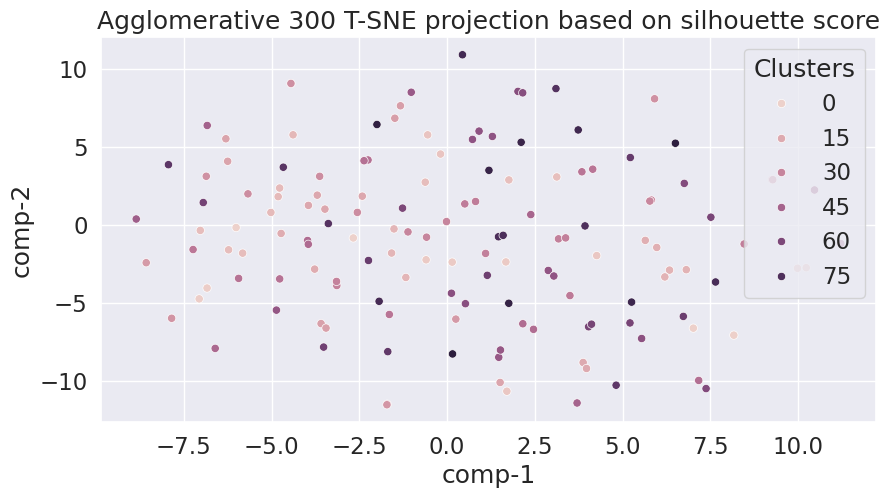

In [ ]:
title = "Agglomerative 300 T-SNE projection based on silhouette score"

visualize_clusters(X_tfidf.toarray(), y_agg_clustring_300, clusters_count, title=title, show_palette=False)